<a href="https://colab.research.google.com/github/vyome9248/Exploring-IMDB-dataset-using-SQLite/blob/main/IMDB_SQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.***

***Loading Dependencies***

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

***Finding count of each genre present in IMDB***

In [1]:
import sqlite3
db = sqlite3.connect("/content/drive/MyDrive/IMDB.sqlite")
cur = db.cursor()
cur.execute("Select genre,count(genre) from genre  where genre != '' group by genre")
a = cur.fetchall()
for i in range(len(a)):
    print(*a[i])

Action 33
Adventure 43
Animation 13
Biography 21
Comedy 31
Crime 11
Drama 77
Family 3
Fantasy 7
History 6
Horror 2
Music 3
Musical 1
Mystery 7
Romance 13
Sci-Fi 18
Sport 3
Thriller 14
War 2
Western 2


***Highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database***

In [4]:
cur.execute("select Title,rating from IMDB join earning on IMDB.Movie_Id = earning.Movie_id order by Domestic desc")
a = cur.fetchone()
print(*a)

Star Wars: The Force Awakens (2015) 8.1


***Most voted movie in IMDB Movie Database***

In [5]:
cur.execute("select Title,rating from IMDB order by TotalVotes desc")
a = cur.fetchone()
print(*a)

Inception (2010) 8.8


***Movie with Longest-Running Time from IMDB Movie database***

In [6]:
cur.execute("select title, cast(runtime as int) from IMDB where runtime != '' and CAST(runtime as int) order by cast(runtime as int) desc ")
a = cur.fetchone()
print(*a)

The Wolf of Wall Street (2013) 180


***Year and name of the movie which was the highest grosser in that year***

In [7]:
cur.execute("select SUBSTR(title, LENGTH(title) - 4, 4),title as 'domestic + worldwide' from IMDB join earning on IMDB.movie_id = earning.movie_id group by SUBSTR(title, LENGTH(title) - 4, 4) having max(domestic+worldwide) ")
a = cur.fetchall()
for i in range(len(a)):
    print(*a[i])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


***The percentage of the budget for each genre in IMDB Movie Dataset***

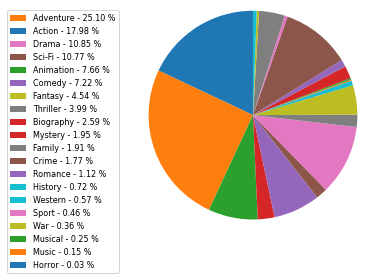

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


In [17]:
data = pd.read_sql_query("Select genre,sum(budget) from genre join IMDB on genre.movie_id = IMDB.movie_id group by genre having budget and genre != ''",db)
x = data["genre"]
y = data["sum(budget)"]
percent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x,percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.show()
data = pd.read_sql_query('select genre,sum(budget) from IMDB inner join genre on IMDB.movie_id=Genre.movie_id group by genre having genre!="" ',db)
total = sum(data['sum(budget)'])
li = data['genre']
j =0
for i in data['sum(budget)'][:]:
    print(li[j],format((i/total)*100,'.2f'))
    j+=1
